<h1> BirdNet: Classify Bird Species </h1>
<p> Based on the TensorFlow tutorial <a href="https://www.tensorflow.org/tutorials/images/classification#visualize_the_data"> found here. </a> </p>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
from tensorflow.python.util import compat
tf.executing_eagerly()

True

In [5]:
# Construct a tf.data.Dataset
# We want birds!
# ds = tfds.load('caltech_birds2010', split='train', shuffle_files=True)
DATASET='caltech_birds2010'
ds = tfds.load(DATASET, split='train')
print("Loaded dataset {}".format(DATASET))

Loaded dataset caltech_birds2010


<PrefetchDataset element_spec={'bbox': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None)}>
dict_keys(['bbox', 'image', 'image/filename', 'label', 'label_name', 'segmentation_mask'])
dict_keys(['bbox', 'image', 'image/filename', 'label', 'label_name', 'segmentation_mask'])


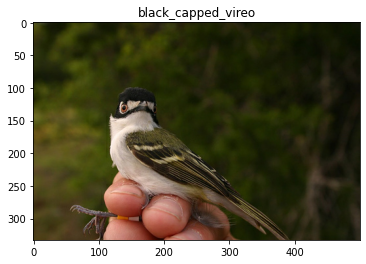

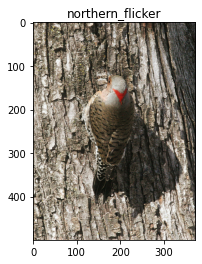

In [6]:
#Show some birds!
print(ds)
samples = ds.take(2)  # Grab a couple

#plot
for bird in samples:
    print(bird.keys())
    image = bird["image"]
    label_name = str(bird["label_name"].numpy())
    label_name = str.split(label_name,"'")[1]
    plt.figure()
    plt.imshow(image)
    plt.title(label_name)

In [8]:
#Resize and normalize training data
def resize_imgs(tensor):
    return tf.image.resize(tensor['image'], (128,128)), tensor['label']

def normalize_imgs(image, label):
    return image / 255.0 , label

def make_imgs(ds):
    print("Resizing dataset......./")
    resized_dataset = ds.map(map_func=resize_imgs)
    print("Normalizing dataset......./")
    normalized_dataset = resized_dataset.map(map_func=normalize_imgs)
    print("Done!")
    return normalized_dataset

normalized_dataset = make_imgs(ds)

Resizing dataset......./
Normalizing dataset......./
Done!


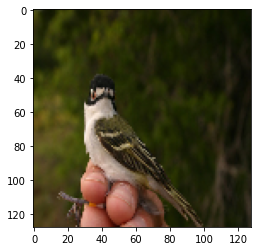

150


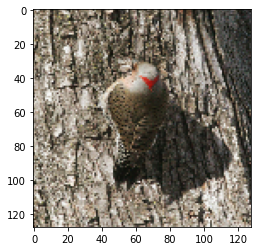

35


In [9]:
#Show some resized guys
for index, (image, label) in enumerate(normalized_dataset):
    plt.imshow(image)
    plt.show()
    print(label.numpy())
    if index >=1: 
        break

In [39]:
num_classes = 200 #200 birds

model = Sequential([
  layers.Conv2D(16, 3, activation='leaky_relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='leaky_relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='leaky_relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='leaky_relu'),
  layers.Dropout(.2),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print("Model compiled.")

Model compiled.


In [40]:
BATCH_SIZE = 8
#training dataset batch
dataset = normalized_dataset.repeat().batch(BATCH_SIZE)
model.fit(dataset, steps_per_epoch=len(ds)/BATCH_SIZE, epochs=10)

Epoch 1/10
379/379 [==============================] - 45s 118ms/step - loss: 5.2891 - accuracy: 0.0059
Epoch 2/10
379/379 [==============================] - 33s 86ms/step - loss: 5.0523 - accuracy: 0.0181
Epoch 3/10
379/379 [==============================] - 35s 93ms/step - loss: 4.5209 - accuracy: 0.0816
Epoch 4/10
379/379 [==============================] - 41s 107ms/step - loss: 3.3727 - accuracy: 0.2586
Epoch 5/10
379/379 [==============================] - 37s 97ms/step - loss: 1.9415 - accuracy: 0.5303
Epoch 6/10
379/379 [==============================] - 40s 105ms/step - loss: 0.9611 - accuracy: 0.7625
Epoch 7/10
379/379 [==============================] - 43s 112ms/step - loss: 0.4995 - accuracy: 0.8717
Epoch 8/10
379/379 [==============================] - 40s 104ms/step - loss: 0.3186 - accuracy: 0.9197
Epoch 9/10
379/379 [==============================] - 45s 120ms/step - loss: 0.2368 - accuracy: 0.9510
Epoch 10/10
379/379 [==============================] - 33s 86ms/step - loss:

In [42]:
#evaluate performance
test_dataset = tfds.load(DATASET, split='train')
test_dataset = test_dataset.map(map_func=resize_imgs).map(map_func=normalize_imgs).batch(BATCH_SIZE)
model.evaluate(test_dataset)

375/375 [==============================] - 12s 31ms/step - loss: 0.0805 - accuracy: 0.9873


[0.08046390116214752, 0.987333357334137]